<a href="https://colab.research.google.com/github/asu-trans-ai-lab/DLSim-MRM/blob/main/DLSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class Link:
    def __init__(self,link_id,length=1,number_of_lanes=1,speed_limit=60,lane_cap=5,
                 BPR_alpha_term=0.15,BPR_beta_term=4):
        self.link_id=link_id
        self.BRP_alpha=float(BPR_alpha_term)
        self.BRP_beta=float(BPR_beta_term)
        self.flow_volume=0
        self.link_capacity = int(lane_cap)* int(number_of_lanes)
        self.length=float(length)
        self.free_flow_travel_time_in_min=self.length / max(0.001,int(speed_limit)) * 60

        self.m_LinkOutFlowCapacity=[self.link_capacity]*g_number_of_simulation_intervals
        self.m_LinkCumulativeArrival=[0]*g_number_of_simulation_intervals
        self.m_LinkCumulativeDeparture=[0]*g_number_of_simulation_intervals
        self.m_LinkCumulativeVirtualDelay=[0]*g_number_of_simulation_intervals
        self.Entrance_queue=list() # link-in queue  of each link
        self.Exit_queue=list() # link-out queue  of each link
        self.Initialization()
    def Initialization(self):
        self.travel_time = self.free_flow_travel_time_in_min*(1 + self.BRP_alpha*pow(self.flow_volume / max(0.00001, self.link_capacity), self.BRP_beta))
    def ResetMOE(self):
        self.m_CumulativeArrivalCount = 0
        self.m_CumulativeDepartureCount = 0
        self.m_CumulativeVirtualDelayCount = 0

#simulation on the single link 
g_number_of_simulation_intervals=20  # 1 simulation interval=1 min
g_link_list=[]
link_id=1
link=Link(link_id)
g_link_list.append(link)
print("link id: {}".format(link.link_id))
print("link travel time: {}".format(link.travel_time))
print("link capacity:{}".format(link.link_capacity))
print("link cumulative arrival counts in each simulation interval:{}".format(link.m_LinkCumulativeArrival))
print("link cumulative departure counts in each simulation interval:{}".format(link.m_LinkCumulativeArrival))

link id: 1
link travel time: 1.0
link capacity:5
link cumulative arrival counts in each simulation interval:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
link cumulative departure counts in each simulation interval:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


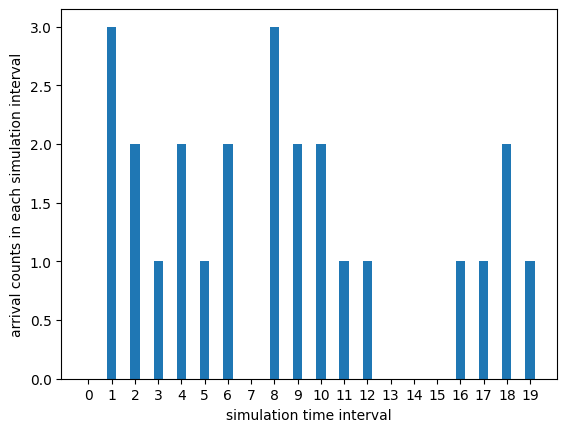

In [ ]:
class Agent():
    def __init__(self,agent_id,path_link_sequence,
                 departure_time_in_min):
        self.agent_id=agent_id
        self.agent_seq_no=agent_id-1
        self.path_link_sequence=path_link_sequence
        self.departure_time_in_min=float(departure_time_in_min)
        self.m_Veh_LinkArrivalTime_in_simu_interval=[0,0]
        self.m_Veh_LinkDepartureTime_in_simu_interval=[0,0]
        self.path_link_seq_no_list=[0]
        self.m_current_link_seq_no=0
        self.m_bGenerated=False
        self.departure_time_in_simu_interval = self.departure_time_in_min
            
# generate 25 agents with random departure time
import random
import matplotlib.pyplot as plt
g_agent_list=[]
dt_2_counts=dict()
for i in range(25):
    rand_dt=random.randint(1,19)
    if rand_dt not in dt_2_counts:
        dt_2_counts[rand_dt]=0
    dt_2_counts[rand_dt]+=1
    agent=Agent(agent_id=i+1,path_link_sequence=[1],departure_time_in_min=rand_dt)
    g_agent_list.append(agent)
    
#the arrival counts in each simulation interval
time_list=[]
link_arrival_counts=[]
for t in range(g_number_of_simulation_intervals):
    time_list.append(t)
    
    if t not in dt_2_counts:
        counts=0
    else:
        counts=dt_2_counts[t]
    link_arrival_counts.append(counts)
fig = plt.figure()
plt.bar(time_list,link_arrival_counts,0.4)
plt.xticks(time_list)
plt.xlabel("simulation time interval")
plt.ylabel("arrival counts in each simulation interval")
plt.show()


simu time=  0 min, with active_agents=  0 , CA= 0 , CD= 0
simu time=  1 min, with active_agents=  0 , CA= 0 , CD= 0
simu time=  2 min, with active_agents=  3 , CA= 3 , CD= 0
simu time=  3 min, with active_agents=  5 , CA= 5 , CD= 5
simu time=  4 min, with active_agents=  6 , CA= 6 , CD= 6
simu time=  5 min, with active_agents=  8 , CA= 8 , CD= 8
simu time=  6 min, with active_agents=  9 , CA= 9 , CD= 9
simu time=  7 min, with active_agents=  11 , CA= 11 , CD= 11
simu time=  8 min, with active_agents=  11 , CA= 11 , CD= 11
simu time=  9 min, with active_agents=  14 , CA= 14 , CD= 11
simu time=  10 min, with active_agents=  16 , CA= 16 , CD= 13
simu time=  11 min, with active_agents=  18 , CA= 18 , CD= 18
simu time=  12 min, with active_agents=  19 , CA= 19 , CD= 19
simu time=  13 min, with active_agents=  20 , CA= 20 , CD= 20
simu time=  14 min, with active_agents=  20 , CA= 20 , CD= 20
simu time=  15 min, with active_agents=  20 , CA= 20 , CD= 20
simu time=  16 min, with active_agents=

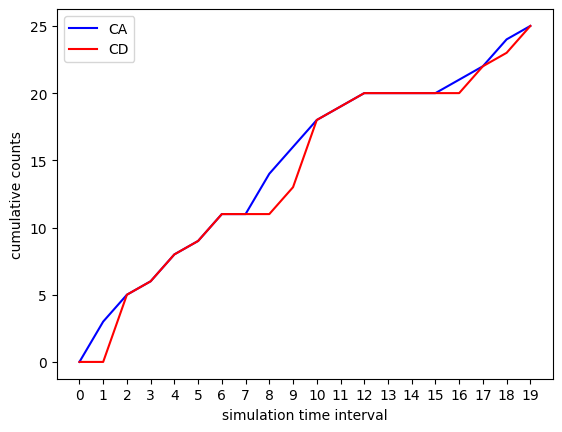

In [ ]:
#simulation process
g_start_simu_interval_no=0
g_end_simu_interval_no=20

g_TotalCumulative_Arrival_Count=0
g_TotalCumulative_Departure_Count=0

g_agent_list.sort(key=lambda x:x.departure_time_in_min)
for agent_no in range(len(g_agent_list)):
    g_agent_list[agent_no].m_current_link_seq_no=0
    g_agent_list[agent_no].Entrance_queue=[]
    g_agent_list[agent_no].Exit_queue=[]
    
current_active_agent_id=0
for t in range(g_start_simu_interval_no,g_end_simu_interval_no,1):
    print("simu time= ",t,"min, with active_agents= ",current_active_agent_id,
          ", CA=",g_TotalCumulative_Arrival_Count,", CD=",g_TotalCumulative_Departure_Count)
    
    if t>=1:
        g_link_list[0].m_LinkCumulativeArrival[t]= g_link_list[0].m_LinkCumulativeArrival[t-1]
        g_link_list[0].m_LinkCumulativeDeparture[t]= g_link_list[0].m_LinkCumulativeDeparture[t-1]
   
    #if t>=agent's departure_time_in_simu_interval then activate the agent
    for agent_no in range(current_active_agent_id,len(g_agent_list),1):
        agent=g_agent_list[agent_no]
        if(t>=agent.departure_time_in_simu_interval):
            agent.m_bGenerated=True
            first_link_seq=agent.path_link_seq_no_list[0]        
            g_link_list[first_link_seq].Entrance_queue.append(agent.agent_seq_no)
            g_TotalCumulative_Arrival_Count+=1
            agent.m_Veh_LinkArrivalTime_in_simu_interval[0] = agent.departure_time_in_min
            agent.m_Veh_LinkDepartureTime_in_simu_interval[0] =agent.m_Veh_LinkArrivalTime_in_simu_interval[0] +\
                g_link_list[first_link_seq].free_flow_travel_time_in_min
            g_link_list[first_link_seq].m_LinkCumulativeArrival[int(agent.departure_time_in_simu_interval)] += 1
            
        else:
            break
    current_active_agent_id=agent_no   

    # move from entrance queue to exit queue
    for li in range(0,len(g_link_list)):
        link=g_link_list[li]
        while(len(link.Entrance_queue)>0):  #there are agents in the Entrance_queue
            agent_seq=link.Entrance_queue[0]
            link.Entrance_queue.pop(0)
            
            link.Exit_queue.append(agent_seq)
            g_agent_list[agent_seq].m_Veh_LinkDepartureTime_in_simu_interval[g_agent_list[agent_seq].m_current_link_seq_no]=\
                    g_agent_list[agent_seq].m_Veh_LinkArrivalTime_in_simu_interval[g_agent_list[agent_seq].m_current_link_seq_no]+\
                    link.travel_time
    
    #move from current link to next link/destinaation
    for li in range(0,len(g_link_list)):
        link=g_link_list[li]
        link_seq_no=li
        #check if the current link has sufficient capacity
        #check if there are agents in exit queue
        while (g_link_list[link_seq_no].m_LinkOutFlowCapacity[t]>=1 and len(g_link_list[link_seq_no].Exit_queue)>=1):
            #print(g_link_list[link_seq_no].Exit_queue)
            agent_no=g_link_list[link_seq_no].Exit_queue[0]
            
             #the future departure time on this link is later than the current time
            if(g_agent_list[agent_no].m_Veh_LinkDepartureTime_in_simu_interval[g_agent_list[agent_no].m_current_link_seq_no]>t):
                break       
           
            if(g_agent_list[agent_no].m_current_link_seq_no==len(g_agent_list[agent_no].path_link_seq_no_list)-1): # end of the path
                g_link_list[link_seq_no].Exit_queue.pop(0)
                g_agent_list[agent_no].m_bCompleteTrip = True
                g_link_list[link_seq_no].m_LinkCumulativeDeparture[t] += 1
                g_TotalCumulative_Departure_Count += 1
            else:  #  not complete the trip. move to the next link's entrance queue
                next_link_seq=g_agent_list[agent_no].path_link_seq_no_list[g_agent_list[agent_no].m_current_link_seq_no+1]
                g_link_list[link_seq_no].Exit_queue.pop(0)
                g_link_list[next_link_seq].Entrance_queue.append(agent_no)
                g_agent_list[agent_no].m_Veh_LinkDepartureTime_in_simu_interval[g_agent_list[agent_no].m_current_link_seq_no]=t
                g_agent_list[agent_no].m_Veh_LinkArrivalTime_in_simu_interval[g_agent_list[agent_no].m_current_link_seq_no+1]=t
                g_link_list[link_seq_no].m_LinkCumulativeDeparture[t] += 1
                g_link_list[next_link_seq].m_LinkCumulativeArrival[t] += 1
    
            g_agent_list[agent_no].m_current_link_seq_no+=1
            g_link_list[link_seq_no].m_LinkOutFlowCapacity[t]-=1 
            
#plot the cumulative  curve on the single link
time_list=[]
cumulative_arrival=[]
cumulative_departure=[]
print(g_link_list[0].m_LinkCumulativeArrival,g_link_list[0].m_LinkCumulativeDeparture)
for t in range(g_number_of_simulation_intervals):
    time_list.append(t)
    cumulative_arrival.append(g_link_list[0].m_LinkCumulativeArrival[t])
    cumulative_departure.append(g_link_list[0].m_LinkCumulativeDeparture[t])
    
plt.plot(time_list,cumulative_arrival,color="blue",label="CA")
plt.plot(time_list,cumulative_departure,color="red",label="CD")
plt.legend()
plt.xticks(time_list)
plt.xlabel("simulation time interval")
plt.ylabel("cumulative counts")
plt.show()

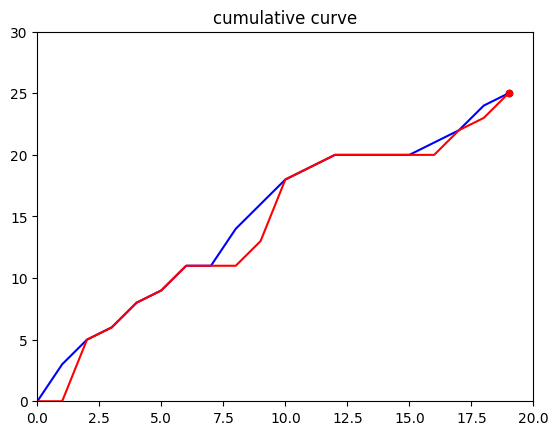

In [ ]:
from IPython import display
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

x=time_list
y1 = cumulative_arrival
y2=cumulative_departure
for i in range(len(x)+1):
    plt.cla()   
    plt.xlim((0, 20))
    plt.ylim((0, 30))
    xx = x[:i]
    yy1 = y1[:i]
    yy2 = y2[:i]
    plt.plot(xx, yy1, color='blue') 
    plt.plot(xx, yy2, color='red')  
    plt.scatter(x[i-1], y1[i-1], color='blue', s=20)  
    plt.scatter(x[i-1], y2[i-1], color='red', s=20)  
    plt.title('cumulative curve')
    display.clear_output(wait=True)
    plt.pause(0.00000001) 
plt.show()
